# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Problem Statement : To findout carprice based on dataset**

In [2]:
df = pd.read_csv('autos_dataset.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [9]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
normalized-losses,?,?,?,164,164,?,158,?,158,?,...,74,103,74,103,74,95,95,95,95,95
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,...,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
num-of-doors,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
body-style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
engine-location,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


## 2. Data Preprocessing

### Steps for Working with Missing Data

1. Identify Missing Data
2. Deal with Missing Data
3. Correct Data Format

## 1. Identify Missing Values

In [10]:
df.replace("?",np.nan, inplace=True)

In [11]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [12]:
df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## 2. Deal with Missing Data

1. Drop Data:
    1. Drop the whole Row
    2. Drop the whole column
2. Replace Data:
    1. Replace Mean
    2. Replace Median 
    3. Replace by Mode [Frequency]
    4. Replace it is based the function

1. normalized Losses = 41
2. num-of-doors = 2
3. bore = 4
4. stroke = 4
5. horspower = 2
6. peak-rpm = 2
7. price = 4

In [15]:
df['normalized-losses'] = df['normalized-losses'].astype('float64')
# df['num-of-doors'] = df['num-of-doors'].astype('float64')
df['bore'] = df['bore'].astype('float64')
df['stroke'] = df['stroke'].astype('float64')
df['horsepower'] = df['horsepower'].astype('float64')
df['peak-rpm'] = df['peak-rpm'].astype('float64')
df['price'] = df['price'].astype('float64')

In [16]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [18]:
df_1 = df.drop(['normalized-losses','num-of-doors','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','fuel-system'],axis=1)

In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    object 
 7   engine-size        205 non-null    int64  
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    float64
 12  peak-rpm           203 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    float64
dtypes: float64(10), int64(5), 

In [20]:
df_1.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [21]:
df['num-of-cylinders']

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 205, dtype: object

In [22]:
df_1['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [23]:
df_1['num-of-cylinders'] = df_1['num-of-cylinders'].replace({
    'one':1,
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'seven':7,
    'eight':8,
    'nine':9,
    'ten':10,
    'eleven':11,
    'twelve':12
})

In [24]:
df_1['num-of-cylinders']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: num-of-cylinders, Length: 205, dtype: int64

In [25]:
df_1.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    float64
 12  peak-rpm           203 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    float64
dtypes: float64(10), int64(6)
m

In [27]:
df_1.isnull().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [28]:
df_1['bore'] = df_1['bore'].fillna(df_1['bore'].mean())
df_1['stroke'] = df_1['stroke'].fillna(df_1['stroke'].mean())
df_1['peak-rpm'] = df_1['peak-rpm'].fillna(df_1['peak-rpm'].mean())
df_1['horsepower'] = df_1['horsepower'].fillna(df_1['horsepower'].mean())
df_1['price'] = df_1['price'].fillna(df_1['price'].mean())

In [29]:
df_1.isnull().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [30]:
df_1.corr()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
num-of-cylinders,-0.113129,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231439,0.008151,-0.020002,0.691208,-0.124358,-0.445837,-0.466666,0.687770
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.130083,0.488760,0.606462,0.559152,0.171101,0.648485,0.231439,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.160944,0.129522,0.182939,-0.055351,0.168783,0.008151,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


## 3. Feature Engineering

### 1. EDA - Exploratory Data Analysis

<Axes: xlabel='horsepower', ylabel='count'>

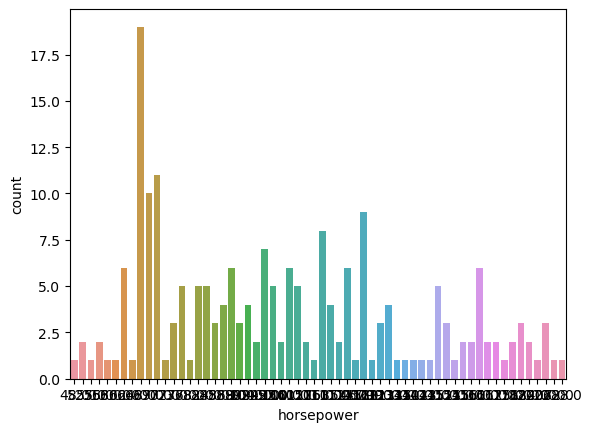

In [31]:
sns.countplot(x = 'horsepower', data =df_1)

<Axes: xlabel='num-of-cylinders', ylabel='count'>

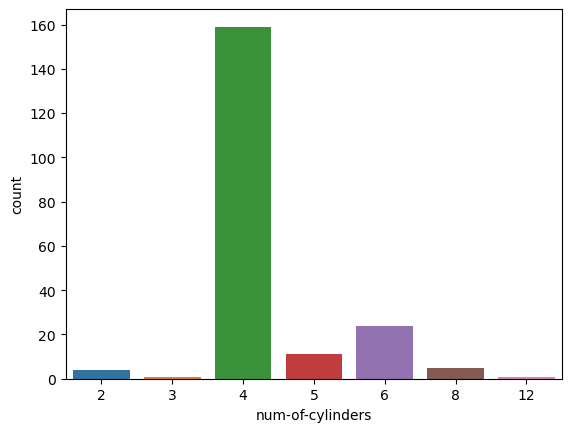

In [32]:
sns.countplot(x='num-of-cylinders', data=df_1)

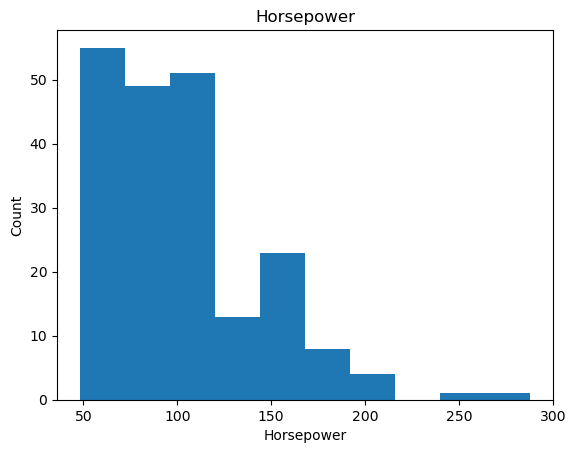

In [33]:
plt.hist(df_1['horsepower'])
plt.title("Horsepower")
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.show()

<Axes: >

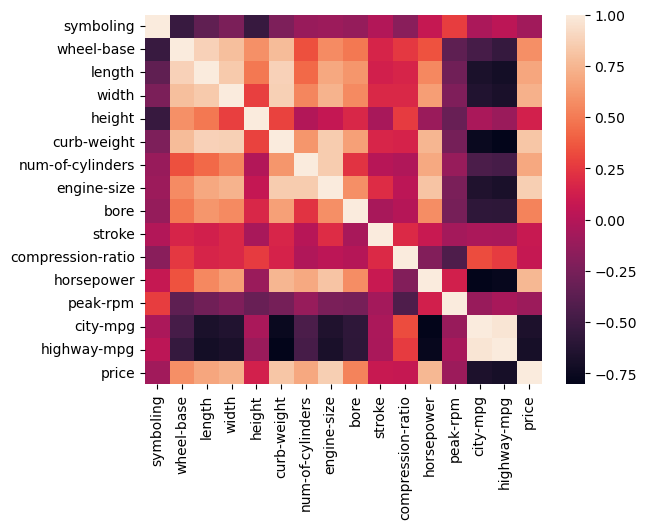

In [34]:
sns.heatmap(df_1.corr())

<Axes: xlabel='fuel-type'>

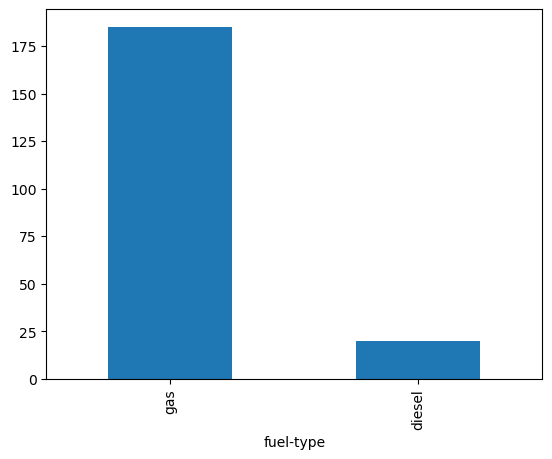

In [35]:
df['fuel-type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='fuel-type', ylabel='count'>

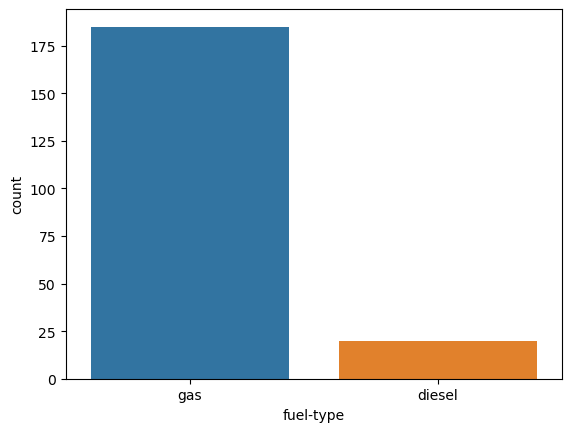

In [36]:
sns.countplot(x='fuel-type', data=df)

<Axes: ylabel='count'>

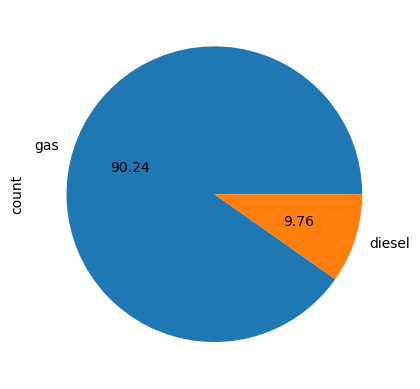

In [37]:
df['fuel-type'].value_counts().plot.pie(autopct ='%.2f')

In [38]:
df_1.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Contineous numerical Variables

(0.0, 47414.1)

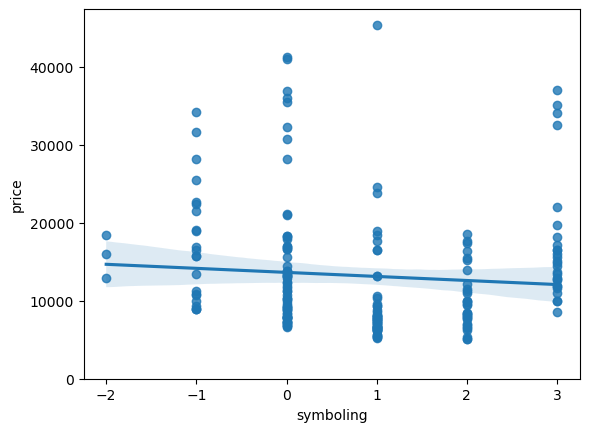

In [42]:
sns.regplot(x ="symboling", y ="price", data=df_1)
plt.ylim(0,)

In [43]:
df[['symboling','price']].corr()

,symboling,price
symboling,1.000000,-0.082391
price,-0.082391,1.000000


## Positive Relationship

In [45]:
df_1[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.861752
price,0.861752,1.000000


(0.0, 52594.40920400863)

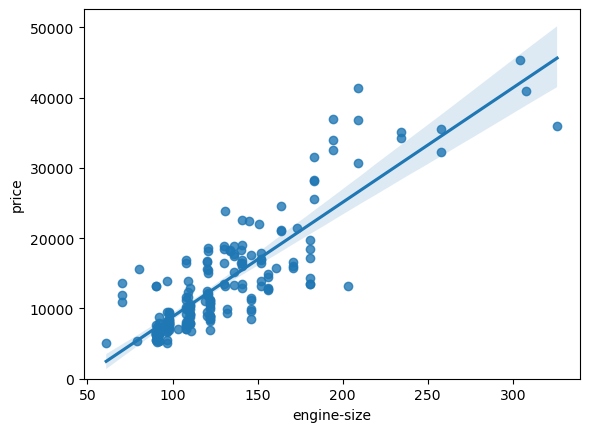

In [46]:
sns.regplot(x ="engine-size", y ="price", data=df_1)
plt.ylim(0,)

In [47]:
df_1[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.690526
price,-0.690526,1.000000


(0.0, 48134.833913828414)

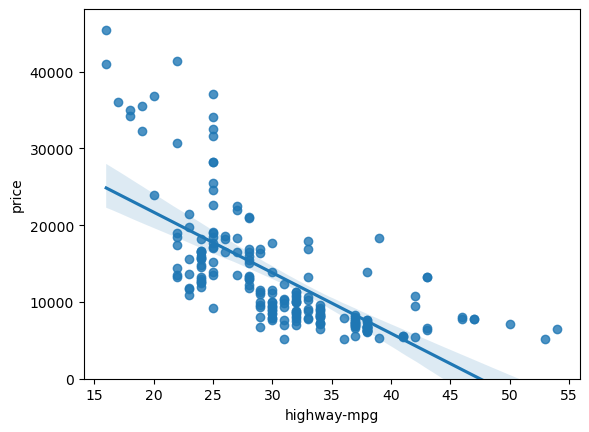

In [48]:
sns.regplot(x ="highway-mpg", y ="price", data=df_1)
plt.ylim(0,)

## Weak Linear Relationship

(0.0, 47414.1)

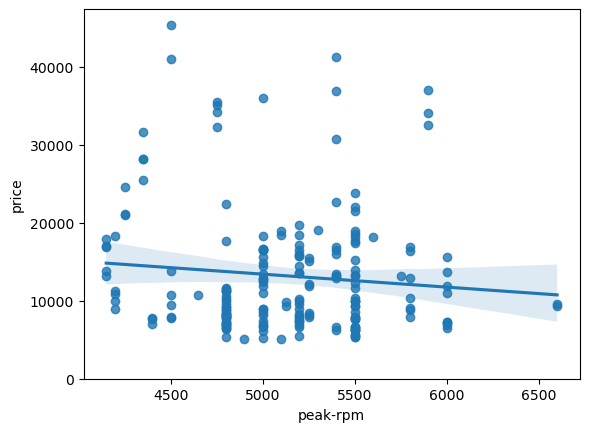

In [49]:
sns.regplot(x ="peak-rpm", y ="price", data=df_1)
plt.ylim(0,)

In [50]:
df_1[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.100854
price,-0.100854,1.000000


In [51]:
df_1[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082095
price,0.082095,1.000000


(0.0, 47414.1)

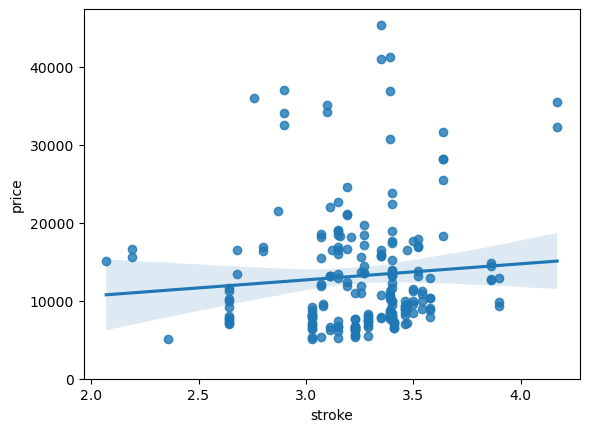

In [52]:
sns.regplot(x ="stroke", y ="price", data=df_1)
plt.ylim(0,)

## Categorical Variable

<Axes: xlabel='body-style', ylabel='price'>

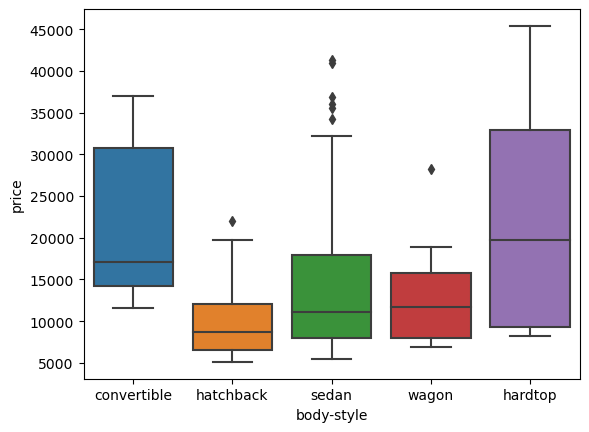

In [54]:
sns.boxplot(x='body-style',y='price', data=df)

<Axes: xlabel='engine-location', ylabel='price'>

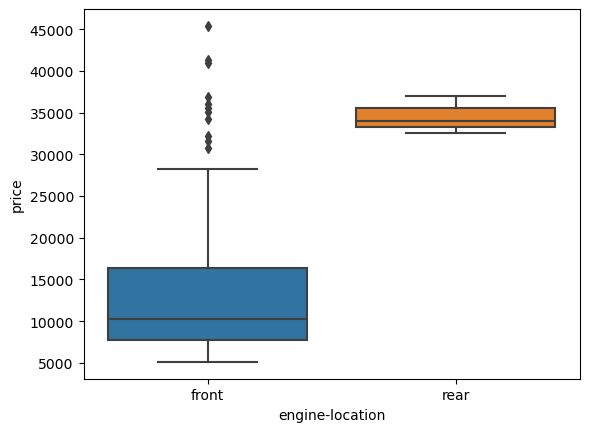

In [55]:
sns.boxplot(x = 'engine-location', y ='price',data= df)

## Model Developments

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x = df_1.drop('price', axis=1)

In [60]:
y = df_1['price']

In [62]:
x.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22


In [63]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [64]:
x.shape

(205, 15)

In [65]:
y.shape

(205,)

In [66]:
from sklearn.linear_model import LinearRegression

In [72]:
lin_model = LinearRegression()

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

In [73]:
lin_model.fit(x_train, y_train)

LinearRegression()

In [74]:
new_predict = lin_model.predict(x_test)

In [77]:
new_predict[:10]

array([10666.40323419, 10064.49007046,  5143.85307764, 12209.68215234,
       11649.16686254, 28181.09797011, 10111.96508923, 12929.31771316,
        7778.29646524,  9100.48122712])

In [78]:
lin_model.coef_

array([ 1.27764808e+02,  1.82728775e+02, -3.47435937e+01,  1.60960154e+03,
        9.60199644e+01, -6.49607566e-01, -5.15624071e+03,  2.50965611e+02,
       -1.73681464e+04, -1.09807099e+04,  5.84876538e+01,  3.25104765e+01,
        6.87062273e-01, -4.99141151e+02,  3.71906432e+02])

In [79]:
lin_model.intercept_

-30388.65967057965

In [80]:
lin_model.score(x_test, y_test)

0.5912209962704716

In [81]:
df_1.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [82]:
lin_model = LinearRegression()

In [87]:
x = df_1[['highway-mpg']]
y = df_1['price']

In [88]:
lin_model.fit(x,y)

LinearRegression()

In [89]:
y_bar = lin_model.predict(x)

In [90]:
y_bar[:10]

array([16166.94140528, 16166.94140528, 16955.96802513, 13799.86154571,
       20112.07450456, 17744.99464499, 17744.99464499, 17744.99464499,
       21690.12774427, 20112.07450456])

In [91]:
lin_model.intercept_

37470.66014138313

In [92]:
lin_model.coef_

array([-789.02661986])

In [93]:
x = df_1[['engine-size']]
y = df_1['price']

In [95]:
lin_model_1 = LinearRegression()

In [96]:
lin_model_1.fit(x, y)

LinearRegression()

In [97]:
y_bar = lin_model_1.predict(x)

In [99]:
y_bar[:10]

array([13710.72939852, 13710.72939852, 17293.12088782, 10291.173886  ,
       14687.74525924, 14687.74525924, 14687.74525924, 14687.74525924,
       13873.5653753 , 13873.5653753 ])

(0.0, 50456.15619559984)

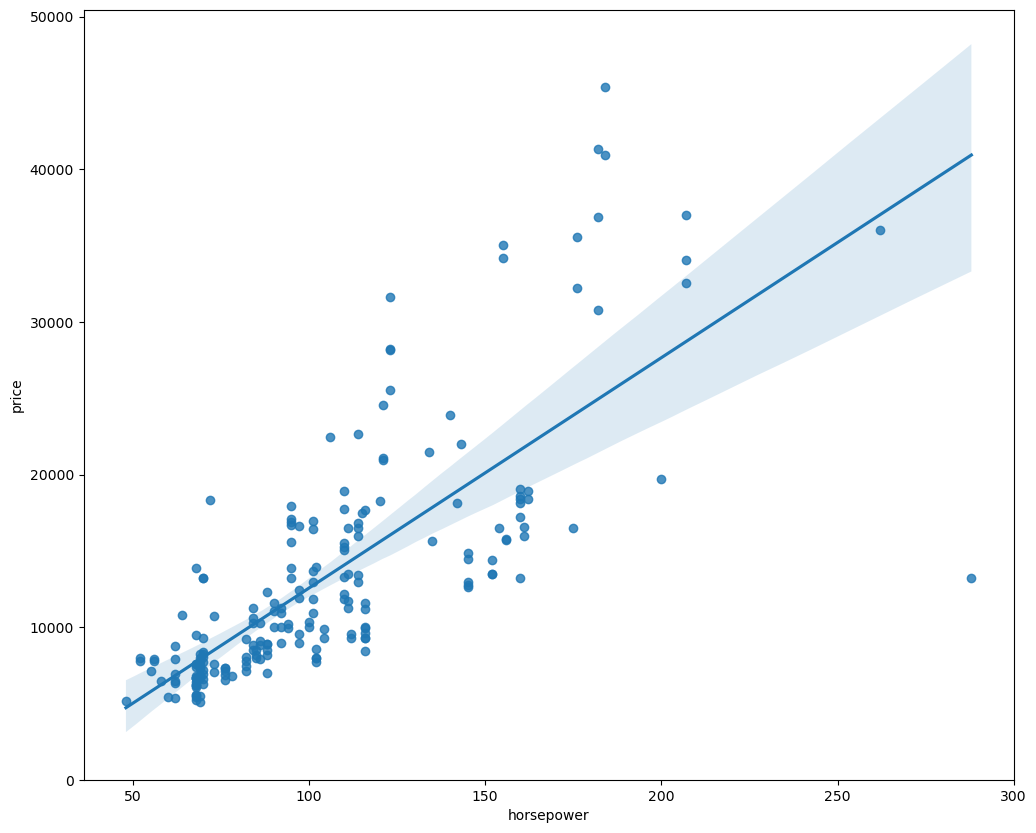

In [100]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x = 'horsepower', y='price', data=df_1)
plt.ylim(0,)